## Multiple Classifiers

The scope of the following is:
- Given a dataset, run multiple classifiers on it simultaneously. 
- Identify hyperparameters of a classifier, and perform cross validation in order to identify appropriate values of such hyperparameters. 
- Apply it to an real-life dataset as obtained from sklearn.datasets.
- Show how to get the coefficients 

Reading material:
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- http://scikit-learn.org/stable/modules/cross_validation.html
- http://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://www.cs.cornell.edu/people/tj/svm_light/svm_multiclass.html

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score

import seaborn as sns
sns.set(style="white")

from sklearn.svm import SVC

from __future__ import print_function

# Press shift+Enter to execute this (or any other Jupyter) cell

In [77]:
# template: make_classification(n_samples, n_features, n_informative, n_redundant, n_classes = 2, weights, random_state)
num_samples = 500
X, y = make_classification(num_samples, 2, 2, 0, weights=[.5, .5], random_state=25)

In [78]:
num_training = 300
num_test = num_samples - num_training

In [79]:
# Randomly shuffle the inputs.
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 15)

#### Plots
We plot the training and the test data. 

[(-5, 5),
 (-5, 5),
 None]

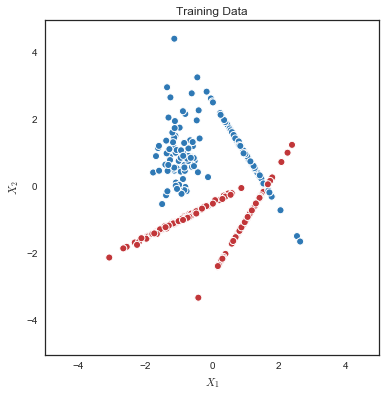

In [80]:
# training data.
f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X[:num_training,0], X[:num_training, 1], c=y[:num_training], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set_title('Training Data')

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 5),
 (-5, 5),
 None]

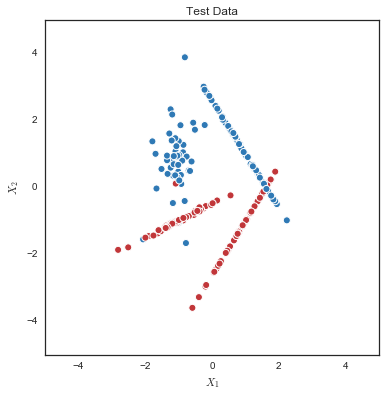

In [81]:
f, ax = plt.subplots(figsize=(8, 6))

# Plot the outputs on the test data.
ax.scatter(X[num_training:,0], X[num_training:, 1], c=y[num_training:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set_title('Test Data')

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [82]:

classifiers = [LogisticRegression(), SVC(kernel='linear')]
# Run multiple classifiers on the same instance at once.
# fit the SVM

for model in classifiers:
    model.fit(X[:num_training], y[:num_training])
    y_pred = model.predict(X[num_training:])
    y_true = y[num_training:]
    # report metrics
    print("Accuracy of ", model, " is =", model.score(X[:num_training], y[:num_training]))
    print("Coefficients of the decision boundary:")
    print(model.coef_)

Accuracy of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  is = 0.936666666667
Coefficients of the decision boundary:
[[-0.41526331  3.13695379]]
Accuracy of  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  is = 0.946666666667
Coefficients of the decision boundary:
[[-0.53923772  2.18440534]]


In [83]:
print(confusion_matrix(y_true, y_pred))

[[97  2]
 [15 86]]


In [84]:
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.977272727273
0.851485148515


In [85]:
print(log_loss(y_true, y_pred))

2.93580398954


### Real dataset - Iris data

Visualizations of this dataset are available at:
https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations



In [86]:
iris = datasets.load_iris()
print(type(iris))

<class 'sklearn.datasets.base.Bunch'>


Check out the data and the target variable by iris.data and iris.target. As one can observe, iris data is multi-class. 
How do we apply SVM to this? This is the problem of multiclass SVM (see reference above).

In [87]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
clf = SVC(kernel='linear')
X, y = iris.data, iris.target
clf.fit(X, y)
acc = (clf.score(X,y))*100
print("Accuracy = %.2f" %acc)
print(clf.coef_)

Accuracy = 99.33
[[-0.04625854  0.5211828  -1.00304462 -0.46412978]
 [-0.00722313  0.17894121 -0.53836459 -0.29239263]
 [ 0.59549776  0.9739003  -2.03099958 -2.00630267]]


This high accuracy is not unexpected, since we are training the model on the whole data, and then testing for the accuracy on the same dataset. What if we were to use the cross-validation methodology, and train on some part of the data, and test on the other? As we see below, the accuracy is still quite high.

#### Cross-validation

In [89]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [90]:
model = SVC(kernel='linear', C=1)
clf = model.fit(X_train, y_train)
acc = (clf.score(X_test, y_test))*100
print("Accuracy = %.2f" %acc)

Accuracy = 96.67


In [91]:
scores = cross_validation.cross_val_score(model, iris.data, iris.target, cv = 5)
print(scores)

[ 0.96666667  1.          0.96666667  0.96666667  1.        ]


Given the $k$ in the k-fold cross validation, there are k scores corresponding to each fold/split. How do we aggregate these to present a single score for the classifier? 

We may take the k scores, and output the mean score as the aggregate; in fact given these k numbers, we may find the variance (and hence the standard deviation), and this will help in providing confidence bounds. The 95% __confidence intervals__ for the scores are computed in the usual manner: 95% roughly corresponds to 2 standard deviations away. The variable scores is a numpy array, and has methods .mean() and .std().

In [92]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


#### Feature Normalization/Scaling

In [93]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)  

0.93333333333333335

In [94]:
# Check out how this works, print(X_train), print(X_train_transformed)

#### Regularization in Logistic Regression

In [123]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf = LogisticRegression(C = 0.4, solver = 'liblinear')
clf = clf.fit(X_train, y_train)
print("Accuracy: %.2f" %clf.score(X_test, y_test))
print(clf.coef_)
print(np.max(clf.coef_), np.min(clf.coef_))

Accuracy: 0.85
[[ 0.32150567  1.00877248 -1.62298231 -0.7484922 ]
 [ 0.19283982 -1.01439401  0.3395363  -0.473274  ]
 [-1.04102553 -0.65155194  1.44735166  1.20181302]]
1.44735166497 -1.62298231443


[ 0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]
[ 2.05369888  2.22853747  0.          0.          0.          0.          0.
  0.          0.        ]


/Users/sroy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sroy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sroy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


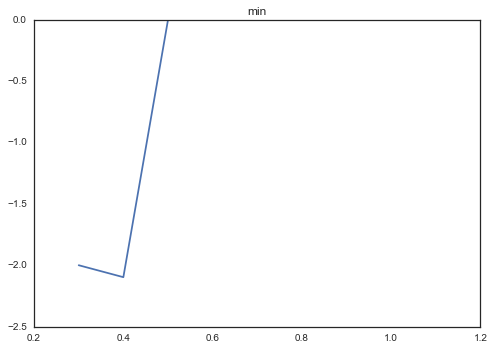

In [125]:
c_range = np.arange(0.3, 1.2, 0.1)
plotMax = np.array([0.0]*len(c_range))
plotMin = np.array([0.0]*len(c_range))
scoreArr = np.array([0.0]*len(c_range))
for i in c_range:
    model = LogisticRegression(C = i, solver = 'liblinear')
    clf = model.fit(X_train, y_train)
    scoreArr[i] = clf.score(X_test, y_test)
    plotMax[i] = np.max(clf.coef_)
    plotMin[i] = np.min(clf.coef_)

print(c_range)
print(plotMax)
# And now plot these
f, ax = plt.subplots()
ax.plot(c_range, plotMin)
ax.set_title("min")

#### Debug this. 

Why is the curve looking like this?

#### Corrected Version:

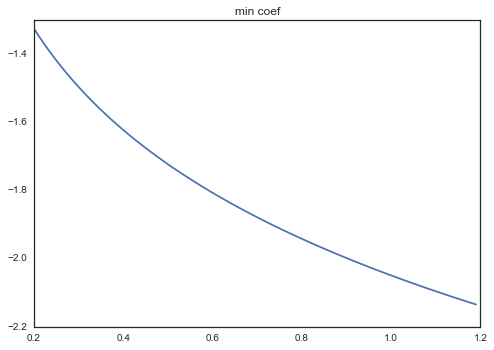

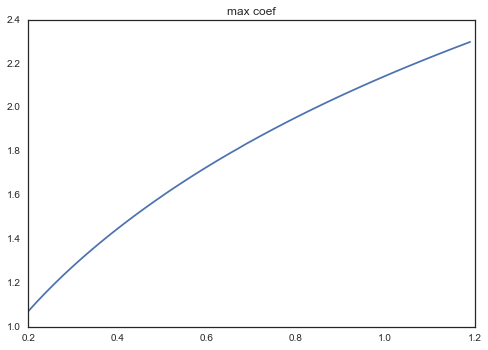

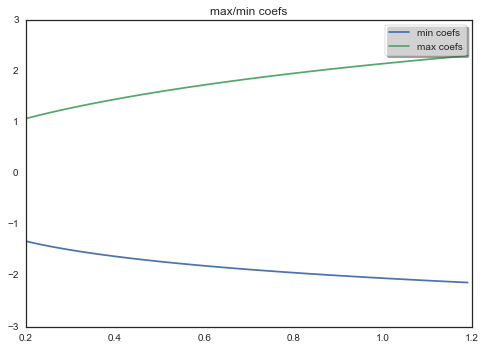

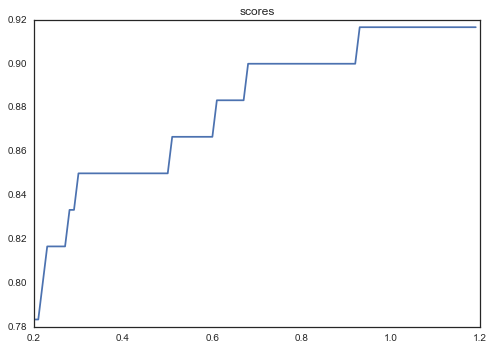

In [145]:
c_range = np.arange(0.2, 1.2, 0.01)
plotMax = np.array([0.0]*len(c_range))
plotMin = np.array([0.0]*len(c_range))
scoreArr = np.array([0.0]*len(c_range))
for i in range(len(c_range)):
    model = LogisticRegression(C = c_range[i], solver = 'liblinear')
    clf = model.fit(X_train, y_train)
    scoreArr[i] = clf.score(X_test, y_test)
    plotMax[i] = np.max(clf.coef_)
    plotMin[i] = np.min(clf.coef_)

# And now plot these
f, ax = plt.subplots()
ax.plot(c_range, plotMin)
ax.set_title("min coef")

f, ax = plt.subplots()
ax.plot(c_range, plotMax)
ax.set_title("max coef")

f, ax = plt.subplots()
ax.plot(c_range, plotMin, label = 'min coefs')
ax.plot(c_range, plotMax, label = 'max coefs')
ax.set_title("max/min coefs")
ax.legend(frameon = True, shadow = True, fancybox = True, framealpha = 0.5)
plt.show()

f, ax = plt.subplots()
ax.plot(c_range, scoreArr)
ax.set_title("scores")